# 超市商品数据分析大作业

# 1 背景及意义

本报告主要对一家超市2018年6-7月的销售数据进行商店商品情况分析、销售额情况分析和用户情况分析。<br/>
商店商品情况分析：商品结构、优势商品、劣势/待优化商品等情况分析；<br/>
销售情况分析：销售额、销量、利润情况分析；<br/>
用户情况分析：客户数量、新老客户、RFM模型等情况分析。

# 2 数据导入与预处理

## 2.1 Basket数据导入与预处理

In [1]:
import pandas as pd #导入pandas模块
basket=pd.read_csv('D:/anaconda/testt/python与数理统计/大作业1/2/Basket.csv')
basket = basket.iloc[:,:]
basket

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.00
1,2018/6/1,D007,3,250200,32.70
2,2018/6/1,D007,1,161068,16.80
3,2018/6/1,D007,8,5325,30.40
4,2018/6/1,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018/7/5,A010,2,284211,34.71
571548,2018/7/5,A010,2,284601,44.80
571549,2018/7/5,A010,2,284241,6.50
571550,2018/7/5,A010,2,284352,15.90


In [2]:
basket.isnull().any()#查看所有缺失值

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool

由上可看出，Basket表中数据属性没有缺失值。

In [3]:
basket.describe()#查看数据分布情况

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


由上可以看出，订单金额最小值为负数，说明数据存在异常值，需要删除订单金额小于零的数据。

In [4]:
basket_data1=basket[basket['BASK_SPEND']>0]  #剔除data中bask_spend列小于0的行
basket_data1

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.00
1,2018/6/1,D007,3,250200,32.70
2,2018/6/1,D007,1,161068,16.80
3,2018/6/1,D007,8,5325,30.40
4,2018/6/1,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018/7/5,A010,2,284211,34.71
571548,2018/7/5,A010,2,284601,44.80
571549,2018/7/5,A010,2,284241,6.50
571550,2018/7/5,A010,2,284352,15.90


In [5]:
basket_data1.describe()#查看数据分布情况

,POS_NO,BASK_CODE,BASK_SPEND
count,569797.000000,569797.000000,569797.000000
mean,2.994330,167572.136898,39.583197
std,2.502507,87224.915886,196.158166
min,1.000000,961.000000,0.010000
25%,1.000000,90673.000000,9.000000
50%,2.000000,177692.000000,20.000000
75%,3.000000,238933.000000,44.800000
max,20.000000,323914.000000,79920.000000


In [6]:
basket_data1.duplicated().sum()#查看是否有重复值

0

In [7]:
display(basket_data1.shape)

(569797, 5)

## 2.2 item数据导入与预处理

In [8]:
import pandas as pd #导入pandas模块
item=pd.read_csv('D:/anaconda/testt/python与数理统计/大作业1/2/item.csv')
#item = data.iloc[:,:]
item

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,-0.5


In [9]:
item = pd.read_csv('D:/anaconda/testt/python与数理统计/大作业1/2/item.csv')
item['SDATE']=pd.to_datetime(item['SDATE'])
item.isnull().any()#查看所有缺失值

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

由上可看出，item表中数据属性没有缺失值。

In [10]:
item.describe()#查看数据分布情况

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


由上可以看出，item表中的ITEM_QUANTITY字段有负值，即商品数量为负； <br/> 
ITEM_SPEND字段数据最小值为负数，及商品消费金额最小值为负数，说明数据存在异常值，需要删除商品消费金额小于零的数据。<br/>
item表中的DISCOUNT_AMOUTN字段数据有正值，说明数据存在异常值，即商品折扣后金额比折扣前金额高。<br/>

In [11]:
item_data0=item[item['ITEM_QUANTITY']>0]  #剔除basket中bask_spend列小于等于0的行
item_data1_1=item_data0[item_data0['ITEM_SPEND']>0]  #剔除basket中bask_spend列小于0的行
item_data1=item_data1_1[item_data1_1['DISCOUNT_AMOUNT']<=0]
item_data1.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [12]:
display(item_data1.shape)

(1730083, 10)

In [13]:
item_data1.describe()#查看数据分布情况

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.730083e+06,1.730083e+06,1.730083e+06,1.730083e+06,1.730083e+06,1.730083e+06,1.730083e+06
mean,2.993408e+00,1.660228e+05,1.144741e+05,1.444067e+00,1.303603e+01,1.420604e+01,-1.611557e+00
std,2.465074e+00,8.581571e+04,8.160808e+04,6.975142e+00,9.334519e+01,2.392658e+01,5.146317e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,1.000000e-02,1.000000e-02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.999650e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758750e+05,1.233210e+05,1.000000e+00,7.010000e+00,7.700000e+00,0.000000e+00
75%,3.000000e+00,2.229690e+05,1.959930e+05,1.000000e+00,1.203000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,0.000000e+00


In [14]:
item_data1.duplicated().sum()#查看是否有重复值

212634

可以看出，item表中有212634条重复数据，因此需要保留重复出现的行中第一次出现的行，去掉其他重复行。

In [15]:
item_data2 = item_data1.drop_duplicates(keep='first')#去掉重复行，并保留重复出现的行中第一次出现的行
item_data2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


# 3 商店商品分析

## 3.1 按照消费额大小排序

In [16]:
#商店商品按消费额大小排序
basket_data1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False).head(10)

,STORE_CODE,BASK_SPEND
0,A001,3.478348e+06
15,D002,3.177385e+06
20,D007,1.382203e+06
4,A008,1.324641e+06
8,A013,1.126551e+06
2,A006,9.439233e+05
7,A012,8.546610e+05
17,D004,8.153388e+05
19,D006,8.144365e+05
5,A009,8.052129e+05


<AxesSubplot:xlabel='STORE_CODE'>

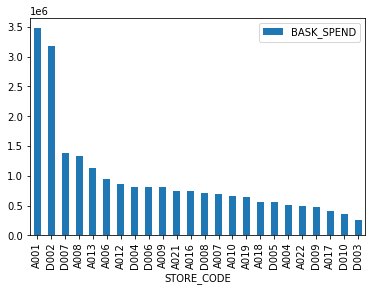

In [17]:
#商店按消费额大小排序
import numpy as np
import matplotlib.pyplot as plt
a=basket_data1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)
a.set_index('STORE_CODE',inplace=True)
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
#plt.xlabel('消费总额')
a.plot(kind='bar')

## 3.2 按照结账次数大小排序

In [18]:
#商店按结账次数大小排序
basket_data1.loc[:,'STORE_CODE'].value_counts()

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

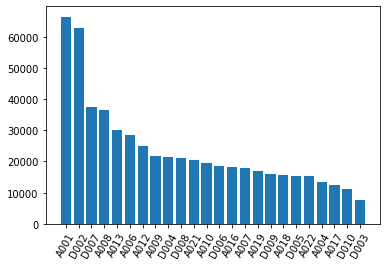

In [19]:
# 结账次数排序
import numpy as np
import matplotlib.pyplot as plt
count = basket_data1.loc[:,'STORE_CODE'].value_counts()
name = list(count.index)
plt.bar(np.arange(len(name)), count)
# 设置横坐标
plt.xticks(np.arange(len(name)), name, rotation=60)   # rotation 旋转横坐标标签
plt.show()

我们发现A001、D002、D007、A008、A013、A006和A012等商店不论是在销售额还是在结账次数大小排序中，一直排在前列。说明其商品很受欢迎。

## 3.3 统计超市每个商店具有的pos机

In [20]:
# 统计每个商店具有的pos机
S_pos =basket_data1.groupby(by="STORE_CODE")
Shop_pos = S_pos["POS_NO"]
Shop_pos.unique()

STORE_CODE
A001               [6, 3, 2, 9, 10, 1, 5, 4]
A004                               [2, 4, 1]
A006                               [2, 4, 1]
A007                               [2, 1, 8]
A008                      [3, 1, 8, 2, 6, 4]
A009                               [1, 2, 8]
A010                               [8, 2, 3]
A012                            [2, 8, 3, 1]
A013                         [2, 6, 1, 8, 4]
A016                               [1, 2, 3]
A017                                  [1, 8]
A018                               [1, 2, 4]
A019                               [1, 2, 3]
A021                            [2, 3, 4, 1]
A022                                  [2, 1]
D002    [4, 1, 5, 8, 19, 6, 7, 2, 13, 20, 9]
D003                                  [2, 1]
D004                               [1, 2, 4]
D005                               [2, 3, 4]
D006                               [3, 2, 1]
D007                            [3, 1, 8, 4]
D008                               [1, 4, 2]

我们发现A001、D002拥有最多的pos机，这也从侧面印证了其客流量较大，受欢迎程度高，需要较多的pos机缓解结账压力。

# 4 销售额分析

## 4.1 日销售额分析

In [21]:
basket_data1["SHOP_DATETIME"] = pd.to_datetime(basket_data1["SHOP_DATETIME"])
basket_data1['year'] = basket_data1["SHOP_DATETIME"].dt.year
basket_data1['month'] = basket_data1['SHOP_DATETIME'].values.astype('datetime64[M]')#方便后续的分析，新增加年份列和月份列

<ipython-input-21-988a16e9c607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_data1["SHOP_DATETIME"] = pd.to_datetime(basket_data1["SHOP_DATETIME"])
<ipython-input-21-988a16e9c607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_data1['year'] = basket_data1["SHOP_DATETIME"].dt.year
<ipython-input-21-988a16e9c607>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [22]:
basket_data1.sample(5)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,year,month
161043,2018-06-13,D007,3,261035,9.00,2018,2018-06-01
503488,2018-06-02,D002,2,15099,39.33,2018,2018-06-01
198665,2018-07-02,D005,2,221881,12.50,2018,2018-07-01
325691,2018-06-16,A001,9,278444,74.60,2018,2018-06-01
544545,2018-06-23,D002,4,152262,33.44,2018,2018-06-01


In [23]:
sales_data = basket_data1[['SHOP_DATETIME','BASK_SPEND','month']]
sales_year = sales_data.groupby(['month','SHOP_DATETIME']).sum()
sales_year.style.background_gradient()# 颜色越深，销售额越高

In [24]:
#按照年份、月份对销售子数据集进行分组求和
sales_month = basket_data1[['SHOP_DATETIME','BASK_SPEND','month']]
sales_month = sales_month.groupby(['month','SHOP_DATETIME']).sum()

In [25]:
sales_month = sales_month.groupby(['SHOP_DATETIME']).sum()

<AxesSubplot:title={'center':'每日销售额'}, xlabel='SHOP_DATETIME'>

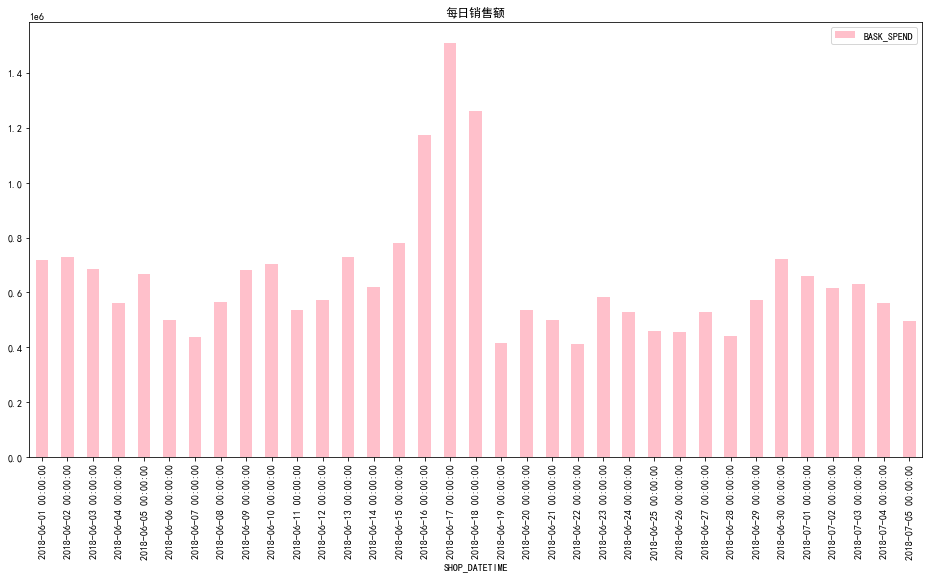

In [26]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sales_month.plot(kind='bar',color="pink",title='每日销售额',figsize=(16,8))

由上图表可以看出，在2018年6月16日、17日和18日的销售额最高，其中6月17日销售额最高。通过查阅发现，2018年6月17日是父亲节，同时6月16、17和18日为端午节三天法定节假日。因此，有理由判定这三天销售额的增长与端午节以及父亲节有一定的关系。

## 4.2 顾客消费额分析

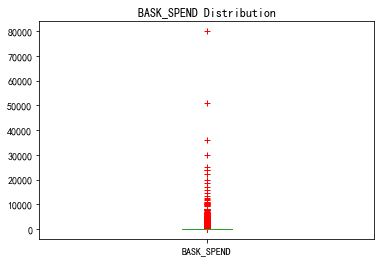

In [27]:
#查看异常值
datatemp2=basket_data1["BASK_SPEND"]
datatemp2.plot(kind='box',title='BASK_SPEND Distribution',sym='r+');

In [28]:
print(basket_data1[basket_data1['BASK_SPEND'] > 80].count())

SHOP_DATETIME    63298
STORE_CODE       63298
POS_NO           63298
BASK_CODE        63298
BASK_SPEND       63298
year             63298
month            63298
dtype: int64


In [29]:
# 直接剔除异常值
basket_data2 = basket_data1[basket_data1['BASK_SPEND'] < 80]

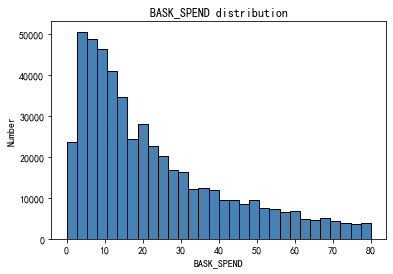

In [30]:
import matplotlib.pyplot as plt
plt.hist(x = basket_data2.BASK_SPEND, # 指定绘图数据
          bins = 30, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色          
        )
# 添加x轴和y轴标签
plt.xlabel('BASK_SPEND')
plt.ylabel('Number')

plt.title('BASK_SPEND distribution')
 # 显示图形
plt.show()

由图表可以看出，消费金额在0~80元内的顾客中，花费20元以内的顾客人数所占比重较大。

# 5 用户情况分析

## 5.1 商品分析

In [31]:
item_data2['year'] = item_data2['SDATE'].dt.year          
item_data2['month'] = item_data2['SDATE'].dt.month
item_data2['day']= item_data2['SDATE'].values.astype('datetime64[D]')

<ipython-input-31-c516e5e7c27a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data2['year'] = item_data2['SDATE'].dt.year
<ipython-input-31-c516e5e7c27a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data2['month'] = item_data2['SDATE'].dt.month
<ipython-input-31-c516e5e7c27a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [32]:
#通过商品号进行分组，对商品数量或者重量进行求和，从大到小进行排序
a1=item_data2.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)
a1.head(10)

,PROD_CODE,ITEM_QUANTITY
8527,149413,37718.000
5316,86772,28661.000
17199,220834,24139.000
1478,7133,21673.000
3883,61623,21318.000
7131,124556,18775.000
12010,194690,18119.336
301,1152,17679.000
7129,124554,15717.000
1480,7137,15284.000


In [33]:
#a.set_index('PROD_CODE',inplace=True)
##plt.rcParams['font.sans-serif'] = ['SimHei']
##plt.rcParams['axes.unicode_minus'] = False
##plt.xlabel('消费总额')
#a.plot(kind='bar')

In [34]:
#通过商品号进行分组，对销售金额进行求和，从大到小进行排序
b1=item_data2.groupby('PROD_CODE')['ITEM_SPEND'].sum().sort_values(ascending=False)
b1.head(10)

PROD_CODE
7137      384910.50
136839    279862.50
7133      272649.00
149413    164153.68
154900    140485.20
1239      131018.20
220834    119922.07
21835     114376.04
88160     103233.60
75283      83522.70
Name: ITEM_SPEND, dtype: float64

由表可见销售金额排名前十的商品号以及其销售金额总数

In [35]:
#计算总销售费用/总用户数量
sumspend=item_data2['ITEM_SPEND'].sum()
number1=item_data2['BASK_CODE'].value_counts()
number=int(len(number1))
number1

205154    60
37307     59
147354    53
211486    53
36227     53
          ..
135689     1
133642     1
186896     1
174622     1
6147       1
Name: BASK_CODE, Length: 280814, dtype: int64

In [36]:
avgspend = sumspend/number
print(avgspend)

74.78840303546123


可得购买205154人数最多，同时对于所有商品人均消费额74.7884元

In [37]:
#销售额按照折扣类型进行分组并进行大小排序
c1=item_data2.groupby('DISCOUNT_TYPE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)
c1

,DISCOUNT_TYPE,ITEM_SPEND
3,n,1.370020e+07
4,p,4.992203e+06
2,m,1.954608e+06
7,v,1.910762e+05
8,x,9.161940e+04
5,q,4.618240e+04
0,Z,2.479515e+04
6,s,9.228600e+02
1,h,2.150000e+01


可以看出折扣类型为n的商品总销售额最高。

In [38]:
#销售数量按照折扣类型进行分组并进行大小排序
d=item_data2.groupby('DISCOUNT_TYPE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)
d

,DISCOUNT_TYPE,ITEM_QUANTITY
3,n,1496483.291
4,p,462191.611
2,m,265343.962
7,v,13264.000
8,x,9687.000
0,Z,2164.472
5,q,1122.000
6,s,224.506
1,h,1.000


可以看出折扣类型为n的商品总销售数量最高

## 5.2 顾客分析

In [39]:
#以每个BASK_CODE作为一个顾客
customer = item_data2[['SDATE', 'BASK_CODE', 'ITEM_SPEND', 'month']].sort_values(['SDATE']).groupby('BASK_CODE')

<AxesSubplot:>

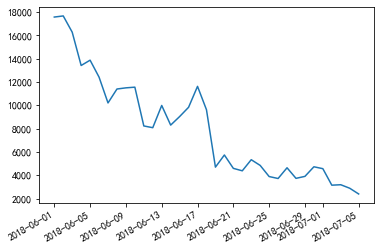

In [40]:
#顾客的第一次购买日期分布
customer.min().SDATE.value_counts().plot()   

上图表说明数据统计的前几天，第一次购买的顾客人数较多

<AxesSubplot:>

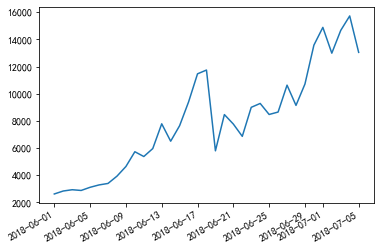

In [41]:
#客户最后一次购买日期分布,发现用户基本没有流失
customer.max().SDATE.value_counts().plot()   

上图表说明数据统计的后几天，最后一次购买的客户所占比重很大，说明顾客几乎没有流失。

In [42]:
item_data2

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,year,month,day
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3,2018,6,2018-06-01
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0,2018,6,2018-06-01
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0,2018,6,2018-06-01
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9,2018,6,2018-06-01
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0,2018,6,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732756,2018-07-05,A010,2,284254,144474,0.470,26.32,56.0,n,0.0,2018,7,2018-07-05
1732757,2018-07-05,A010,2,284265,2243,24.000,43.20,1.8,n,0.0,2018,7,2018-07-05
1732758,2018-07-05,A010,2,284406,216571,1.000,14.50,14.5,n,0.0,2018,7,2018-07-05
1732759,2018-07-05,A010,2,284266,223768,1.000,2.50,3.0,m,-0.5,2018,7,2018-07-05


In [43]:
# 查看每位顾客第一次和最后一次购买记录
customer_record = customer.SDATE.agg(['min','max'])
# 查看只有一次购买记录的顾客数量，第一次和最后一次是同一条记录，则说明购买只有一次(这里将一个BASK_CODE看做一个顾客)
(customer_record['min'] == customer_record['max']).value_counts()

False    169532
True     111282
dtype: int64

([<matplotlib.patches.Wedge at 0x18b33c1dd60>,
 [Text(-0.35210934383272846, 1.042122358452061, 'False'),
  Text(0.35210924626219015, -1.0421223914189122, 'True')],
 [Text(-0.19205964209057913, 0.5684303773374877, '60.372%'),
  Text(0.1920595888702855, -0.5684303953194066, '39.628%')])

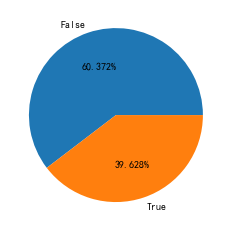

In [44]:
plt.pie((customer_record['min'] == customer_record['max']).value_counts(normalize = True),
       autopct='%.3f%%',
       labels = (customer_record['min'] == customer_record['max']).value_counts().index)

可以看出回头客的比重比只购买一次的顾客的比重略大些

## 5.3 RFM模型分析

RFM模型根据客户活跃程度和交易金额的贡献，进行客户价值细分的一种方法。<br/>
R（Recency）——最近一次交易时间间隔。基于最近一次交易日期计算的得分，距离当前日期越近，得分越高。如5分制。反映客户交易活跃度。
F（Frequency）——客户在最近一段时间内交易次数。基于交易频率计算的得分，交易频率越高，得分越高。如5分制。反映客户交易活跃度。<br/>
M（Monetray）——客户最近一段时间内交易金额。基于交易金额计算的得分，交易金额越高，得分越高。如5分制。反映客户价值。

（1）构建RFM表

In [54]:
rfm = item_data2.pivot_table(index='BASK_CODE',
                            values = ["ITEM_QUANTITY","ITEM_SPEND","SDATE"],
                            aggfunc={"ITEM_QUANTITY":"sum","ITEM_SPEND":"sum","SDATE":"max"})

# 所有用户最大的交易日期为标准，求每笔交易的时间间隔即为R
rfm['R_diff'] = (rfm.SDATE.max() - rfm.SDATE)/np.timedelta64(1,'D')
# 每个客户的总销量即为F，总销售额即为M
rfm.rename(columns={'ITEM_QUANTITY':'F_fre','ITEM_SPEND':'M_sum'},inplace = True)
rfm.head()

,F_fre,M_sum,SDATE,R_diff
BASK_CODE,,,,
961,1.0,25.0,2018-06-18,17.0
962,11.0,132.1,2018-06-18,17.0
964,1.0,14.0,2018-06-18,17.0
965,1.0,20.0,2018-06-18,17.0
966,1.0,12.5,2018-06-18,17.0


In [55]:
rfm = basket_data2.pivot_table(index = 'BASK_CODE',
                    values = ['STORE_CODE','BASK_SPEND','SHOP_DATETIME'],
                    aggfunc= {'BASK_CODE':'count',
                             'BASK_SPEND':'sum',
                             'SHOP_DATETIME':'max'})
rfm['R_diff'] = (rfm.SHOP_DATETIME.max() - rfm.SHOP_DATETIME) / np.timedelta64(1,'D')
rfm.rename(columns={'BASK_CODE':'F_fre','BASK_SPEND':'M_sum'},inplace = True)
rfm.head()

,F_fre,M_sum,SHOP_DATETIME,R_diff
BASK_CODE,,,,
961,1,25.0,2018-06-18,17.0
964,1,28.0,2018-06-18,17.0
965,1,40.0,2018-06-18,17.0
966,1,12.5,2018-06-18,17.0
967,1,14.0,2018-06-18,17.0


（2）对客户价值进行标注，将客户分为8个等级

In [56]:
# 基于平均值做比较，超过均值为1，否则为0
rfm[['R_diff','F_fre','M_sum']].apply(lambda x:x-x.mean())

def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R_diff +level.F_fre +level.M_sum
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要挽留客户",
        "001":"重要发展客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般发展客户"
    }
    result = d[level]
    return result

rfm['label']= rfm[['R_diff','F_fre','M_sum']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,F_fre,M_sum,SHOP_DATETIME,R_diff,label
BASK_CODE,,,,,
961,1,25.0,2018-06-18,17.0,一般挽留客户
964,1,28.0,2018-06-18,17.0,一般挽留客户
965,1,40.0,2018-06-18,17.0,一般挽留客户
966,1,12.5,2018-06-18,17.0,一般挽留客户
967,1,14.0,2018-06-18,17.0,一般挽留客户


（3）重要价值客户和非重要价值客户进行可视化展示

<AxesSubplot:xlabel='F_fre', ylabel='R_diff'>

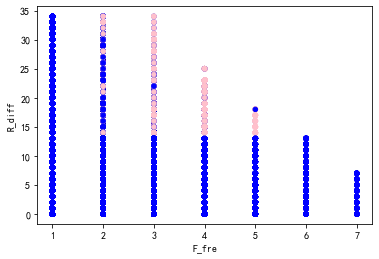

In [57]:
rfm.loc[rfm.label=='重要价值客户','color']='pink'
rfm.loc[~(rfm.label=='重要价值客户'),'color']='blue'
rfm.plot.scatter('F_fre','R_diff',c= rfm.color)

In [58]:
rfm.groupby('label').sum()

,F_fre,M_sum,R_diff
label,,,
一般价值客户,46385,575988.67,431359.0
一般保持客户,86267,1014401.77,209267.0
一般发展客户,37522,596156.96,241361.0
一般挽留客户,59833,980472.58,1402396.0
重要价值客户,65730,2016067.21,518893.0
重要保持客户,190889,5357553.96,340191.0
重要发展客户,6980,409491.49,44081.0
重要挽留客户,12719,746920.70,294452.0


可以看出不同客户的交易活跃度以及客户价值总值

# 6 总结

超市商品销售数据分析是超市管理销售的一个重要环节，有助于管理者做更多的决策提升销售额以及利润等。<br/>
本报告分别从商品、销售额以及顾客三个角度展开进一步的分析，对于受欢迎程度较高的商品可以增加其进货量，对于受欢迎程度较低的商品，由于现有数据量较少，无法得出其受欢迎程度低的原因，需要进一步的分析，并采取相应的措施（如发放消费券等）提升其销售量。<br/>
其次，通过分析可以看出销售额较多的商品其销售量也相对较多，说明商品价格受大多数顾客认可且商品刚需。<br/>
最后，根据已有数据发现该超市回头客顾客所占比重较大，说明顾客具有粘性。<br/>
由于数据量有限，因此需要进一步的挖掘和发现其特性，有助于进一步的分析。